# Special Topics in Computer Science
## INT3121 20 UET ----- 4-6 Wednesday 210 GD3
## Week 4

## Diep Ng., Ph.D.
#### Mail-to: ngocdiep at vnu.edu.vn


In [4]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


# 0. Week 3: Evaluation methods for multi-class classification

In [93]:
from sklearn import metrics



In [96]:
y_true = [1, 1, 1, 2, 2, 2, 0, 0, 0]
y_pred = [1, 0, 0, 2, 2, 2, 1, 2, 1]

metrics.precision_score(y_true, y_pred, average='micro') # globally

0.4444444444444444

In [95]:
metrics.precision_score(y_true, y_pred, average='macro') #for each label

0.3611111111111111

# Week 4
# 1. Python generator

In [5]:
# a list
a = [1, 2, 3, 4]

# list comprehension
[ai**2 for ai in a]

[1, 4, 9, 16]

In [6]:
# generator
(ai**2 for ai in a)

<generator object <genexpr> at 0x1104018e0>

In [7]:
a_gen = (ai**2 for ai in a)
a_gen

<generator object <genexpr> at 0x110401938>

In [8]:
next(a_gen)

1

In [9]:
next(a_gen)

4

In [10]:
for i in range(5):  ### error if access out-of-index
    print(next(a_gen))

9
16


StopIteration: 

In [ ]:
#Compare time of using iterable & generator

In [34]:
%timeit sum(list(range(1000000)))

38.6 ms ± 78.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%timeit sum(range(1000000))

17.5 ms ± 695 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
#define a generator
def reverse_array(arr):
    length = len(arr)
    for i in range(length - 1, -1, -1):
        yield arr[i]     ###### each time, yield one value

#example
rev = reverse_array(
            ["one", "two", "three", "four", "five", "cheers"]
)

rev

<generator object reverse_array at 0x1104c9830>

In [37]:
next(rev)

'cheers'

In [38]:
next(rev)

'five'

In [39]:
rev = reverse_array(
            ["one", "two", "three", "four", "five", "cheers"]
)

# for loop to print all

for s in rev:
    print(s)

cheers
five
four
three
two
one


In [40]:
# try to access again --> error
next(rev)

StopIteration: 

In [41]:
# convert generator to list
rev = reverse_array(
            ["one", "two", "three", "four", "five", "cheers"]
)

list(rev)

['cheers', 'five', 'four', 'three', 'two', 'one']

In [42]:
### Loop forever to an iterable
# Ref: https://docs.python.org/3/library/itertools.html#itertools.cycle
def cycle(iterable):
    # cycle('ABCD') --> A B C D A B C D A B C D ...
    saved = []
    for element in iterable:
        yield element
        saved.append(element)
    while saved:
        for element in saved:
              yield element

In [43]:
# try it
c = cycle([1,2,3])

for i in range(10):
    print(next(c))

1
2
3
1
2
3
1
2
3
1


In [44]:
# try this? --> non stop!!!
list(c)

KeyboardInterrupt: 

# 2. Generating over the data 

In [57]:
### using itertools function
from itertools import cycle

# given two lists of samples & their targets
# each time yield a batch_size numbers of samples


def iter_data(xs, ys):
    assert len(xs) == len(ys)
    
    idx = range(len(xs)) #make an id generator
    idx = cycle(idx)     # make it loop forever
    for i in idx:
        yield (xs[i], ys[i])
    
def data_gen(xs, ys, batch_size):

    data = iter_data(xs, ys)
    while True:
        x_batch = []
        y_batch = []
        while len(x_batch) < batch_size:
            x, y = next(data)
            x_batch.append(x)
            y_batch.append(y)
        yield (x_batch, y_batch)
        

In [58]:
# make some dummy data
xs = list(range(100))
ys = [0]*20 + [1]*30 + [2]*50

batch_size = 8

datagen = data_gen(xs, ys, batch_size)


In [59]:
next(datagen)

([0, 1, 2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
# feed all data in one epoch?
# because generator loop forever, we need to tell it when to stop
# --> steps_per_epoch = samples // batch_size

In [61]:
steps_per_epoch = len(xs) // batch_size
for _ in range(steps_per_epoch):
    x_batch, y_batch = next(datagen)
    print(x_batch, y_batch)

[8, 9, 10, 11, 12, 13, 14, 15] [0, 0, 0, 0, 0, 0, 0, 0]
[16, 17, 18, 19, 20, 21, 22, 23] [0, 0, 0, 0, 1, 1, 1, 1]
[24, 25, 26, 27, 28, 29, 30, 31] [1, 1, 1, 1, 1, 1, 1, 1]
[32, 33, 34, 35, 36, 37, 38, 39] [1, 1, 1, 1, 1, 1, 1, 1]
[40, 41, 42, 43, 44, 45, 46, 47] [1, 1, 1, 1, 1, 1, 1, 1]
[48, 49, 50, 51, 52, 53, 54, 55] [1, 1, 2, 2, 2, 2, 2, 2]
[56, 57, 58, 59, 60, 61, 62, 63] [2, 2, 2, 2, 2, 2, 2, 2]
[64, 65, 66, 67, 68, 69, 70, 71] [2, 2, 2, 2, 2, 2, 2, 2]
[72, 73, 74, 75, 76, 77, 78, 79] [2, 2, 2, 2, 2, 2, 2, 2]
[80, 81, 82, 83, 84, 85, 86, 87] [2, 2, 2, 2, 2, 2, 2, 2]
[88, 89, 90, 91, 92, 93, 94, 95] [2, 2, 2, 2, 2, 2, 2, 2]
[96, 97, 98, 99, 0, 1, 2, 3] [2, 2, 2, 2, 0, 0, 0, 0]


# 3. Image augmentation

Library: `imgaug` https://imgaug.readthedocs.io/en/latest/index.html

Keras: `keras.preprocessing.image.ImageDataGenerator` https://keras.io/preprocessing/image/


In [62]:
%matplotlib inline

In [63]:
import cv2
import matplotlib.pyplot as plt


In [65]:
plt.rcParams['figure.figsize'] = [6,6]

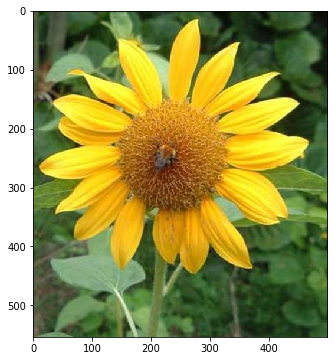

In [67]:
# load an image
img = cv2.imread("flower.jpg")
plt.imshow(img[:,:,::-1])

In [68]:
from imgaug import augmenters as iaa


In [75]:
#make an augmentor object
aug = iaa.Crop(px=(0, 100)) #randomly crop images from each side by 0 to 100 px


In [76]:
aug

CropAndPad(name=UnnamedCrop, parameters=[DiscreteUniform(Deterministic(int 0), Deterministic(int -100)), None, None, None, None, Deterministic(constant), Deterministic(int 0)], deterministic=False)

### Crop an image

In [78]:
# crop the image
batch_images = [img] # only one image

augmented = aug(images=batch_images)

aug_img = augmented[0] #only one image

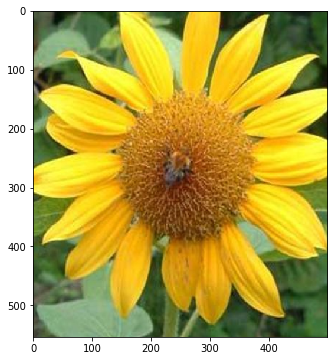

In [79]:
plt.imshow(aug_img[:,:,::-1])

In [80]:
print("original image shape: ", img.shape)
print("augmented image shape: ", aug_img.shape)

original image shape:  (554, 500, 3)
augmented image shape:  (554, 500, 3)


### Blur an image

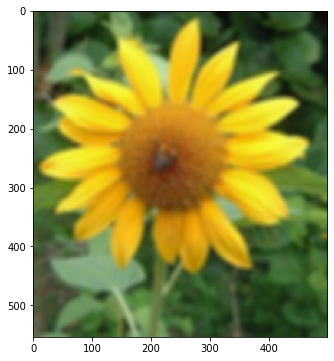

In [83]:
# blur augmentor
aug = iaa.GaussianBlur(sigma=5.0)
aug_img = aug(images=[img])[0]
plt.imshow(aug_img[:,:,::-1])

### Sequentially do augmentation


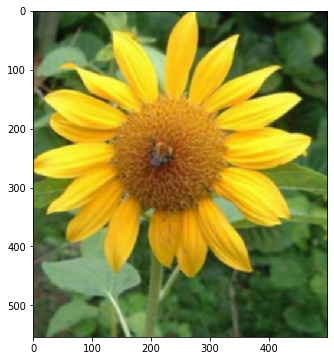

In [87]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

augmented = seq(images=[img])
aug_img = augmented[0]
plt.imshow(aug_img[:,:,::-1])

### Heavy augmentation example

References: https://imgaug.readthedocs.io/en/latest/source/examples_basics.html#heavy-augmentations

In [88]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second
# image.
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image.
seq = iaa.Sequential(
    [
        #
        # Apply the following augmenters to most images.
        #
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images

        # crop some of the images by 0-10% of their height/width
        sometimes(iaa.Crop(percent=(0, 0.1))),

        # Apply affine transformations to some of the images
        # - scale to 80-120% of image height/width (each axis independently)
        # - translate by -20 to +20 relative to height/width (per axis)
        # - rotate by -45 to +45 degrees
        # - shear by -16 to +16 degrees
        # - order: use nearest neighbour or bilinear interpolation (fast)
        # - mode: use any available mode to fill newly created pixels
        #         see API or scikit-image for which modes are available
        # - cval: if the mode is constant, then use a random brightness
        #         for the newly created pixels (e.g. sometimes black,
        #         sometimes white)
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
            rotate=(-45, 45),
            shear=(-16, 16),
            order=[0, 1],
            cval=(0, 255),
            mode=ia.ALL
        )),

        #
        # Execute 0 to 5 of the following (less important) augmenters per
        # image. Don't execute all of them, as that would often be way too
        # strong.
        #
        iaa.SomeOf((0, 5),
            [
                # Convert some images into their superpixel representation,
                # sample between 20 and 200 superpixels per image, but do
                # not replace all superpixels with their average, only
                # some of them (p_replace).
                sometimes(
                    iaa.Superpixels(
                        p_replace=(0, 1.0),
                        n_segments=(20, 200)
                    )
                ),

                # Blur each image with varying strength using
                # gaussian blur (sigma between 0 and 3.0),
                # average/uniform blur (kernel size between 2x2 and 7x7)
                # median blur (kernel size between 3x3 and 11x11).
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)),
                    iaa.AverageBlur(k=(2, 7)),
                    iaa.MedianBlur(k=(3, 11)),
                ]),

                # Sharpen each image, overlay the result with the original
                # image using an alpha between 0 (no sharpening) and 1
                # (full sharpening effect).
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),

                # Same as sharpen, but for an embossing effect.
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),

                # Search in some images either for all edges or for
                # directed edges. These edges are then marked in a black
                # and white image and overlayed with the original image
                # using an alpha of 0 to 0.7.
                sometimes(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0, 0.7)),
                    iaa.DirectedEdgeDetect(
                        alpha=(0, 0.7), direction=(0.0, 1.0)
                    ),
                ])),

                # Add gaussian noise to some images.
                # In 50% of these cases, the noise is randomly sampled per
                # channel and pixel.
                # In the other 50% of all cases it is sampled once per
                # pixel (i.e. brightness change).
                iaa.AdditiveGaussianNoise(
                    loc=0, scale=(0.0, 0.05*255), per_channel=0.5
                ),

                # Either drop randomly 1 to 10% of all pixels (i.e. set
                # them to black) or drop them on an image with 2-5% percent
                # of the original size, leading to large dropped
                # rectangles.
                iaa.OneOf([
                    iaa.Dropout((0.01, 0.1), per_channel=0.5),
                    iaa.CoarseDropout(
                        (0.03, 0.15), size_percent=(0.02, 0.05),
                        per_channel=0.2
                    ),
                ]),

                # Invert each image's channel with 5% probability.
                # This sets each pixel value v to 255-v.
                iaa.Invert(0.05, per_channel=True), # invert color channels

                # Add a value of -10 to 10 to each pixel.
                iaa.Add((-10, 10), per_channel=0.5),

                # Change brightness of images (50-150% of original value).
                iaa.Multiply((0.5, 1.5), per_channel=0.5),

                # Improve or worsen the contrast of images.
                iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5),

                # Convert each image to grayscale and then overlay the
                # result with the original with random alpha. I.e. remove
                # colors with varying strengths.
                iaa.Grayscale(alpha=(0.0, 1.0)),

                # In some images move pixels locally around (with random
                # strengths).
                sometimes(
                    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)
                ),

                # In some images distort local areas with varying strength.
                sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05)))
            ],
            # do all of the above augmentations in random order
            random_order=True
        )
    ],
    # do all of the above augmentations in random order
    random_order=True
)

images_aug = seq(images=[img]*12)

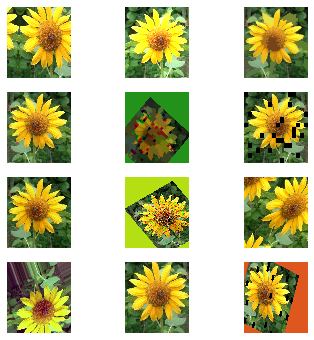

In [92]:
for i in range(12):
    plt.subplot(4,3, i+1)
    plt.imshow(images_aug[i][:,:,::-1])
    plt.axis('off')
plt.show()

# Augmentation on the fly with Generator

- Using `keras`: (https://keras.io/preprocessing/image/)
    + Using `.flow(x,y)`
    + or `.flow_from_directory(directory)`

- Self build:
    1. Build a generator for data
    2. For each batch of data, run the augmentation

In [ ]:
# use keras   .flow(x,y)
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)

# here's a more "manual" example
for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(x_train) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

In [ ]:
# use keras   .flow_from_directory(x,y)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)